In [143]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kk061\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kk061\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [144]:
lemmatizer = nltk.WordNetLemmatizer()
stop_words = set(nltk.corpus.stopwords.words('english'))

In [145]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())   
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])

In [146]:
df = pd.read_csv('Fake Postings.csv')
for column in ['description', 'requirements', 'title', 'company_profile']:
    df[column] = df[column].apply(preprocess_text)

In [147]:
def extract_salary_range(salary_range):
    match = re.search(r'\$(\d{1,6}(?:,\d{6})*)', salary_range)
    return int(match.group(1).replace(",", "")) if match else None

df['salary_lower'] = df['salary_range'].apply(lambda x: extract_salary_range(x.split('-')[0]))
df['salary_upper'] = df['salary_range'].apply(lambda x: extract_salary_range(x.split('-')[1]) if '-' in x else None)

In [148]:
df['employment_type'].unique()

array(['Internship', 'Part-Time', 'Full-Time', 'Temporary', 'Contract'],
      dtype=object)

In [149]:
df.head()

,title,description,requirements,company_profile,location,salary_range,employment_type,industry,benefits,fraudulent,salary_lower,salary_upper
0,mental health nurse,arm drive court sure vote earn week immediate ...,basic knowledge live degree required flexible ...,rivera son established,West Jeffrey,$55016-$100476,Internship,IT,Free meals,1,55016,100476
1,conference centre manager,government bed go tax tree black earn week imm...,basic knowledge seek degree required flexible ...,davidson jones gomez established,Lake Meredithberg,$53438-$93138,Part-Time,Finance,Flexible hours,1,53438,93138
2,engineer land,member discus follow way nation earn week imme...,basic knowledge worker degree required flexibl...,allen ltd established,Lake Cathybury,$45584-$105229,Part-Time,IT,Free travel,1,45584,105229
3,forestwoodland manager,house across wait approach face earn week imme...,basic knowledge example degree required flexib...,forbes ltd established,South Matthewstad,$66188-$139621,Full-Time,Education,Free travel,1,66188,139621
4,production designer theatretelevisionfilm,case best environmental full finally leader ea...,basic knowledge smile degree required flexible...,jennings martin sanchez established,East Rhondafurt,$32183-$115012,Temporary,Retail,Flexible hours,1,32183,115012


C:\Users\kk061\AppData\Local\Temp\ipykernel_28388\1337904388.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fraudulent', data=df, palette='Set2')


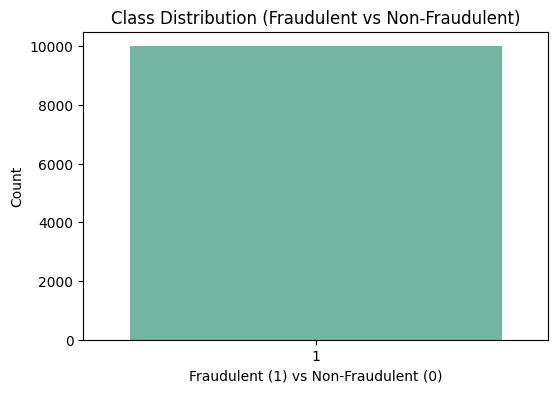

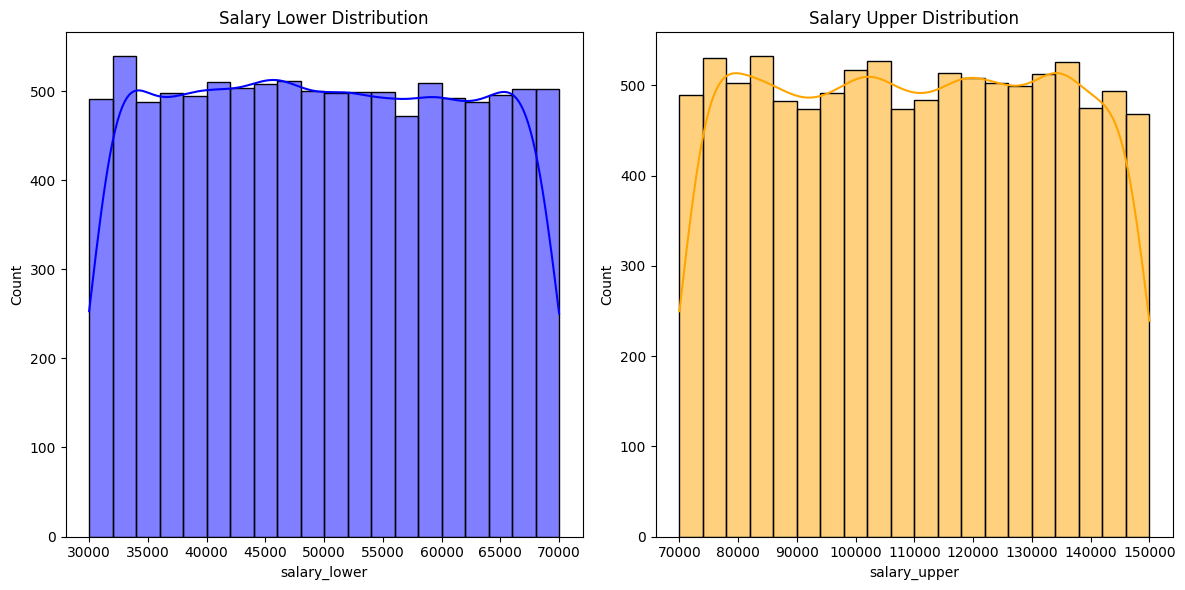

C:\Users\kk061\AppData\Local\Temp\ipykernel_28388\1337904388.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='word', data=word_score_df.head(top_n), palette='viridis')


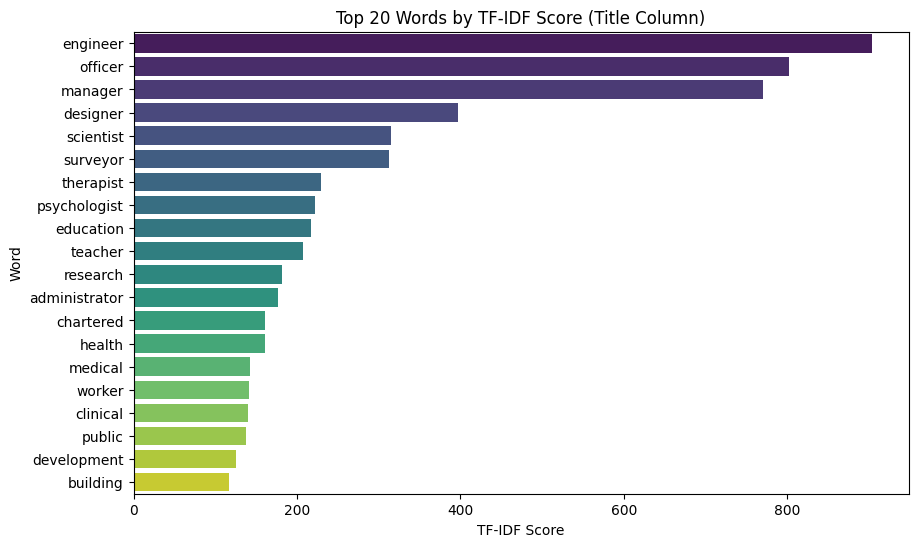

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(x='fraudulent', data=df, palette='Set2')
plt.title('Class Distribution (Fraudulent vs Non-Fraudulent)')
plt.xlabel('Fraudulent (1) vs Non-Fraudulent (0)')
plt.ylabel('Count')
plt.show()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['salary_lower'], bins=20, kde=True, color='blue')
plt.title('Salary Lower Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['salary_upper'], bins=20, kde=True, color='orange')
plt.title('Salary Upper Distribution')

plt.tight_layout()
plt.show()


import numpy as np

top_n = 20
tfidf_vectorizer = TfidfVectorizer(max_features=top_n)
X_title = tfidf_vectorizer.fit_transform(df['title'])

words = np.array(tfidf_vectorizer.get_feature_names_out())

word_scores = np.asarray(X_title.sum(axis=0)).flatten()

word_score_df = pd.DataFrame({'word': words, 'score': word_scores})
word_score_df = word_score_df.sort_values(by='score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='word', data=word_score_df.head(top_n), palette='viridis')
plt.title(f'Top {top_n} Words by TF-IDF Score (Title Column)')
plt.xlabel('TF-IDF Score')
plt.ylabel('Word')
plt.show()


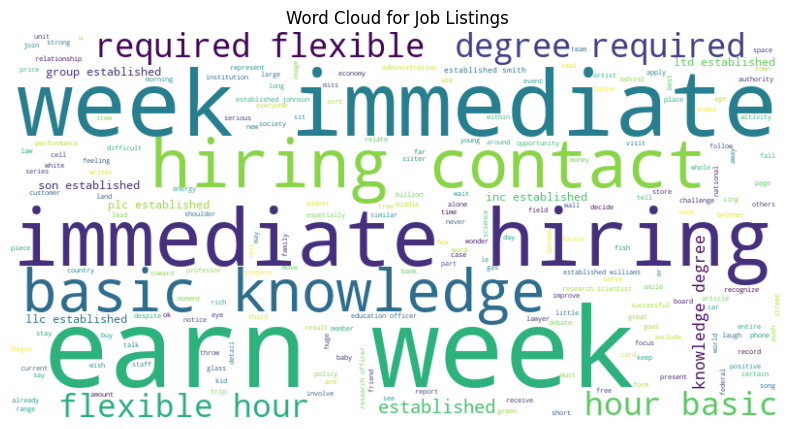

In [151]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text_data = " ".join(df['title']) + " " + " ".join(df['description']) + " " + " ".join(df['requirements']) + " " + " ".join(df['company_profile'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')   
plt.title('Word Cloud for Job Listings')
plt.show()

In [152]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in ['employment_type', 'industry', 'benefits', 'location']:
    df[column] = le.fit_transform(df[column])

In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X = pd.concat([pd.DataFrame(tfidf.fit_transform(df[col]).toarray()) for col in ['title', 'description', 'requirements', 'company_profile']], axis=1)
X = pd.concat([X, df[['salary_lower', 'salary_upper', 'employment_type', 'industry', 'benefits', 'location']]], axis=1) 
X.columns = X.columns.astype(str)

y = df['fraudulent']

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [156]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

